In [1]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


# Question 1: Damping
Equation $$\ddot\eta+2\beta\dot\eta+\frac{k}{m}\eta=0$$
Assume $\tilde\eta=A\exp(i\omega t)$, then we get $$-\omega^2+2i\beta\omega+\frac{k}{m}=0 \quad\Rightarrow\quad \omega=i\beta\pm \sqrt{k/m-\beta^2}$$

## Discussion
### Underdamped $k/m>\beta^2$
We define $\omega=\sqrt{k/m-\beta^2}$, then $\tilde\eta=\exp(-\beta t)[C\exp(-i\omega t)+D\exp(i\omega t)]$. 

$\eta=\exp(-\beta t)[A\cos(\omega t)+B\sin(\omega t)]$ is the real part of $\tilde\eta$.

$\dot\eta=\exp(-\beta t)[(B\omega-A\beta)\cos(\omega t)-(A\omega+B\beta)\sin(\omega t)]$

So, $\eta(0)=A=\eta_0, \dot\eta(0)=B\omega-A\beta=0\Rightarrow B=\beta\eta_0/\omega$

As a result, $$\eta=\eta_0\exp(-\beta t)\left[\cos(\omega t)+\frac{\beta}{\omega}\sin(\omega t)\right]$$

### Critically damped $k/m=\beta^2$
The solution will be $\eta=(At+B)\exp(-\beta t)$, $\dot\eta=[A-\beta(At+B)]\exp(-\beta t)$

So, $\eta(0)=B=\eta_0, \dot\eta(0)=A-\beta B\Rightarrow A=\beta B$

As a result, $$\eta=\eta_0(\beta t+1)\exp(-\beta t)$$

### Overdamped $k/m<\beta^2$
We define $k_\pm=\beta\pm\sqrt{\beta^2-k/m}$, the solution will be $\eta=A\exp(-k_+t)+B\exp(-k_-t)$, $\dot\eta=-k_+A\exp(-k_+t)-k_-B\exp(-k_-t)$

So, $\eta(0)=A+B=\eta_0, \dot\eta(0)=-k_+A-k_-B=0$

We get $B=k_+\eta_0/(k_+-k_-), A=k_-\eta_0/(k_--k_+)$ and 
$$\eta=\frac{\eta_0}{k_--k_+}[k_-\exp(-k_+t)-k_+\exp(-k_-t)]$$

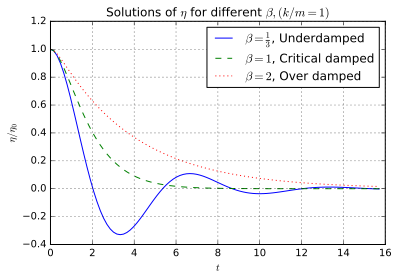

In [2]:
t=linspace(0, 5*pi, 100)
beta1=1/3
omega=sqrt(1-beta1**2)
plot(t, exp(-beta1*t)*(cos(omega*t)+beta1/sqrt(1-beta1**2)*sin(omega*t)), 
     'b',label=r"$\beta=\frac{1}{3}$, Underdamped")
beta2=1
plot(t, exp(-beta2*t)*(1+beta2*t), 'g--',label=r"$\beta=1$, Critical damped")
beta3=2
k1=beta3-sqrt(beta3**2-1)
k2=1/k1
plot(t, (k1*exp(-k2*t)-k2*exp(-k1*t))/(k1-k2), 'r:', label=r"$\beta=2$, Over damped")
grid()
xlabel(r"$t$")
ylabel(r"$\eta/\eta_0$")
title(r"Solutions of $\eta$ for different $\beta, (k/m=1)$")
legend()

## Decay Rate $\Gamma$
+ If $\beta^2\leq k/m$, the decay factor is $\Gamma=\beta$
+ If $\beta^2>k/m$, the decay factor is $$\Gamma=\beta-\sqrt{\beta^2-k/m}=\dfrac{k/m}{\beta+\sqrt{\beta^2-k/m}}$$

We can also get $$\beta=\left(\Gamma+\frac{k/m}{\Gamma}\right)/2$$

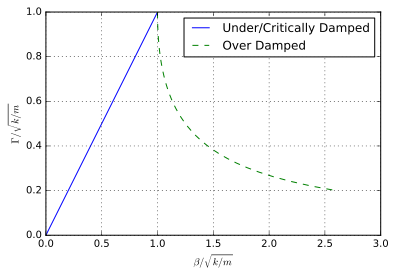

In [3]:
beta=linspace(0,1,20)
plot(beta,beta,label="Under/Critically Damped")
gamma=linspace(1,0.2,40)
plot((gamma+1/gamma)/2, gamma, '--', label="Over Damped")
grid()
xlabel(r"$\beta/\sqrt{k/m}$")
ylabel(r"$\Gamma/\sqrt{k/m}$")
legend()

# Question 2: Double Pendulum

## a) Lagrangian
$$L=T-V=\frac{1}{2}m(l\dot\theta_1)^2+\frac{1}{2}m[(l\dot\theta_1)^2+(l\dot\theta_2)^2+2(l\dot\theta_1)(l\dot\theta_2)\cos(\theta_1-\theta_2)]-2mgl(1-\cos\theta_1)-mgl(1-\cos\theta_2)$$

## b) Small Oscillation
$$L\approx \frac{1}{2}ml^2(2\dot\theta_1^2+\dot\theta_2^2+2\dot\theta_1\dot\theta_2)-\frac{mgl}{2}(2\theta_1^2+\theta_2^2)$$
We can get the Euler-Lagrangian Equation:

$$ml^2\begin{bmatrix}2&1\\1&1\end{bmatrix}\mathbf{\ddot x}+mgl\begin{bmatrix}2&0\\0&1\end{bmatrix}\mathbf{x}=0$$

We define $\omega_0=\sqrt{g/l}$, and assume $\mathbf{x}=\mathbf{A}\exp(i\omega t)$
$$\left(\omega_0^2\begin{bmatrix}2&0\\0&1\end{bmatrix}-\omega^2\begin{bmatrix}2&1\\1&1\end{bmatrix}\right)\mathbf{A}=0$$
$$\Rightarrow\det\left(\omega_0^2\begin{bmatrix}2&0\\0&1\end{bmatrix}-\omega^2\begin{bmatrix}2&1\\1&1\end{bmatrix}\right)=0$$

$$\omega_\pm=\omega_0\sqrt{2\pm\sqrt{2}},\quad \mathbf{A}_\pm=\frac{1}{\sqrt{3}}\begin{bmatrix}1\\ \mp\sqrt 2\end{bmatrix}$$

## c) Modal Matrix
Modal Matrix $$T=\frac{1}{\sqrt{3}}\begin{bmatrix}1&1\\ -\sqrt 2& \sqrt 2\end{bmatrix}$$

General Solution:
$$\begin{bmatrix}\theta_1\\ \theta_2\end{bmatrix}=C_1\mathbf{A_+}\cos(\omega_+t+\phi_+)+C_2\mathbf A_-\cos(\omega_-t+\phi_-)$$

# Question 3: $\mathrm{CO}_2$
We choose the position of Center of Mass Frame to be 0, then $(x_1+x_2)M+mx=0$, that is $x=-(x_1+x_2)M/m$. We define $x_\pm=x_1\pm x_2, $, then $$x=-Mx_+/m,\quad x_1^2+x_2^2=(x_+^2+x_-^2)/2$$

$$L=\frac{1}{2}m\dot x^2+\frac{1}{2}M(\dot x_1^2+\dot x_2^2)-\frac{k}{2}[(x-x_1)^2+(x-x_2)^2]$$

We rewrite $L$ in terms of $x_\pm$ and $c=M/m$:
$$L=\frac{cM\dot x_+^2}{2}+\frac{M(\dot x_+^2+\dot x_-^2)}{4}-\frac{k}{2}\left[(2c(c+1)x_+^2+(x_+^2+x_-^2)/2\right]$$

So, we get the frequency in terms of $\omega_0=\sqrt{k/M}$:
$$\omega_+=\omega_0\sqrt{\frac{2c(c+1)+1/2}{c+1/2}}=\omega_0\sqrt{\frac{m+2M}{m}},\quad\omega_-=\omega_0$$

It is obvious that the eigenvector should be
$$\mathbf{A_\pm}=\begin{bmatrix}1\\\pm1\end{bmatrix}/\sqrt{2}$$

# Question 4: Degeneration
$$\mathbf{V}=\begin{bmatrix}v&v_{12}\\ v_{12}& v\end{bmatrix},\quad \mathbf{M}=\begin{bmatrix}m&m_{12}\\ m_{12}& m\end{bmatrix}$$

$$\mathbf{M}\mathbf{\ddot x}+\mathbf{Vx}=0$$

## a) Solutions
From the characteristic formula, we find:
$$\omega_1^2=\frac{v - v_{12}}{m - m_{12}},\quad\mathbf{A_1}=\left[\begin{matrix}-1\\1\end{matrix}\right]/\sqrt{2}$$
$$\omega_2^2=\frac{v + v_{12}}{m + m_{12}},\quad\mathbf{A_2}=\left[\begin{matrix}1\\1\end{matrix}\right]/\sqrt 2$$

+ If $(v_{12}, m_{12})\to 0$, then, $\omega_1^2\to v/m, \omega_2^2\to v/m$
+ If $(v, m)\to 0$, then, $\omega_1^2\to v_{12}/m_{12}, \omega_2^2\to v_{12}/m_{12}$

In both cases, $\omega_1^2=\omega_2^2$

For the second case, we can apply a elementary row transformation $T=\begin{bmatrix}&1\\ 1&\end{bmatrix}$to make the matrices in OED $\mathbf{M}\mathbf{\ddot x}+\mathbf{Vx}=0$ diagonalize. So we will only discuss the first condition. 

## b), c) Information loss and eigenvectors
If $(v_{12}, m_{12})\to 0$ or $(v, m)\to 0$, then any linear combination of $A_1$ and $A_2$ will also be a eigen vector. So any 2D vector can be its eigen vector.

If we choose two of them and then perform Schmidt's normalization, we can get the answer